### 3초 꿀팁) 복붙으로 데이터프레임 만들기

표를 복사하면 자동으로 데이터프레임을 만들어주는 혁명적인(?) 코드를 최근에 알게 되어 공유합니다.

[코스피 일별 시세](https://finance.naver.com/sise/sise_index.naver?code=KOSPI) 표 부분을 선택하여 복사해 주세요.

In [3]:
import pandas as pd

In [4]:
pd.read_clipboard()

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
0,2023.10.20,"2,375.00",하락 40.80,-1.69%,"521,208","9,295,958"
1,2023.10.19,"2,415.80",하락 46.80,-1.90%,"756,947","9,054,474"
2,2023.10.18,"2,462.60",상승 2.43,+0.10%,"911,546","8,897,571"
3,2023.10.17,"2,460.17",상승 23.93,+0.98%,"509,375","7,711,250"
4,2023.10.16,"2,436.24",하락 19.91,-0.81%,"788,356","8,393,100"
5,2023.10.13,"2,456.15",하락 23.67,-0.95%,"582,884","7,164,460"


# 시계열 데이터 EDA
데이터를 갖고 어떤 작업을 수행하시건, EDA라는 작업을 수행해 주는 것이 꼭 필요합니다.

EDA는 Exploratory Data Analysis의 약자로, 한국어로는 '탐색적 분석'이라고 부릅니다.

갖고 있는 자료의 크기, 구성, 자료형, 분포 등의 '상태를 확인' 하는 과정을 EDA라 합니다.

여러분이 지금 갖고 있는 자료의 형태와 특징을 알아야 그에 맞는 작업을 수행할 수 있고 예기치 못하는 사고를 미연에 방지할 수 있기 때문에, EDA는 꼭 해야 하는 작업이라 생각해 주시면 좋겠습니다.

주가 시계열 데이터를 활용하여 EDA를 수행하는 과정을 알아보겠습니다.

```
제가 말하는 '사고'의 예시는
- 월별 주가를 시간 순으로 정렬한 줄 알았는데 저번에 본 것처럼 알파벳 순으로 정렬해 버렸다거나
- 정수 덧셈 즉 111+222 = 333을 기대했는데 문자열 덧셈 '111'+'222'가 되어서 '111222'가 나온다거나
- 주가수익률이 정규분포를 따른다고 가정하고 퀀트 알고리즘을 짰는데 정규성을 충족하지 못해 투자 성능이 엉망이 된다거나
이런 것들이 있습니다.
```

# 1. 데이터 불러오기
오늘은 [pykrx](https://github.com/sharebook-kr/pykrx)라고 하는 주가 정보 수집 패키지로 데이터를 만들겠습니다.

이 패키지는 사용자들이 커스텀으로 만든 패키지이기 때문에 따로 설치가 필요한데요,

대부분의 커스텀 패키지들은 `pip`라는 명령어로 설치가 가능합니다.

In [5]:
!pip install pykrx #pip는 파이썬 문법이 아니라 프롬프트 명령어이기 때문에 앞에 !을 붙여 줍니다.

In [7]:
from pykrx import stock #pykrx 안에서 주가 정보를 불러오는 모듈을 불러 옵니다.

pykrx로 오뚜기 주가를 불러오겠습니다. pykrx의 사용법은 위에 링크로 첨부해 두었으니 참고해 주세요.

원하시는 종목이 있다면 오늘 실습에서 해당 종목의 코드를 집어넣어서 사용하셔도 무방합니다.

In [42]:
df = stock.get_market_ohlcv("20221021", "20231020", "007310") #007310 오뚜기

# 2. 데이터 확인하기
제일 먼저 할 일은 데이터가 어떻게 생겼는지 보는 일이겠죠?

먼저 데이터의 샘플을 뽑아서 **행과 열이 어떻게 생겨 있는지**부터 봅시다.

In [43]:
df.head() #첫 다섯 행 출력. 괄호 안에 숫자를 넣어 행 수를 바꿀 수 있다.

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2022-10-21,444500,444500,432000,435000,4085,-1.023891
2022-10-24,440000,441500,435000,439500,3286,1.034483
2022-10-25,437500,442000,435500,440500,2548,0.227531
2022-10-26,436500,441000,436500,438000,1176,-0.567537
2022-10-27,439500,444500,439500,441500,2099,0.799087


In [45]:
df.tail() #마지막 다섯 행 출력. 마찬가지로 괄호 안에 숫자로 행 수 변경 가능

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2023-10-16,369500,382000,368500,377000,12320,2.306649
2023-10-17,377000,377000,369500,373500,6457,-0.928382
2023-10-18,372500,374000,369000,372000,3457,-0.401606
2023-10-19,371000,373000,366000,369500,4493,-0.672043
2023-10-20,369000,369500,361000,367500,5166,-0.541272


In [46]:
df.sample(5) #무작위로 다섯 행 출력. 숫자를 지정하지 않으면 1행만 출력됨

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2022-11-01,440500,444000,439000,440500,2042,-0.226501
2023-08-22,367000,372500,361000,370000,6215,0.954980
2023-05-23,461000,461000,456500,457000,1662,-0.218341
2023-04-24,451000,457500,448500,454000,4158,0.776915
2023-05-18,451500,455000,450500,455000,2086,0.663717


In [47]:
df.shape #데이터프레임이 몇 행 몇 열인지 확인

(247, 6)

또 하나 꼭 해야 할 일이 결측치를 확인하는 일입니다. 다행히 여기는 결측치가 없네요.

결측치가 있을 경우 어떻게 해야 하는지도 오늘 다룰 예정입니다!

In [67]:
df.isna().sum()

시가     0
고가     0
저가     0
종가     0
거래량    0
등락률    0
dtype: int64

다음 할 일은 **데이터의 자료형을 확인**하는 일입니다. 이때 `info()` 함수를 사용합니다.

In [48]:
df.info()
#int는 정수(integer), float는 실수를 뜻합니다.
#뒤에 붙은 숫자가 크면 클수록 자리수를 많이 넣을 수 있지만 그만큼 용량이 커집니다.
#예를 들어 int32의 경우 (-1)×2^31 부터 2^31 -1 까지의 값을 넣을 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-10-21 to 2023-10-20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      247 non-null    int32  
 1   고가      247 non-null    int32  
 2   저가      247 non-null    int32  
 3   종가      247 non-null    int32  
 4   거래량     247 non-null    int32  
 5   등락률     247 non-null    float64
dtypes: float64(1), int32(5)
memory usage: 8.7 KB


# 3. 데이터의 분포 파악
행 열 구조와 자료형 확인 후에는 **데이터의 분포**를 확인해 줍니다.

먼저 앞에서 배운 `describe` 함수로 평균, 표준편차, 4분위값 등을 확인해 줍니다.
- 상식에서 벗어나는 값은 없는지 확인하여 올바른 데이터인지 확인합시다.

In [49]:
df['등락률'].describe()

count    247.000000
mean      -0.064687
std        1.246323
min       -4.102564
25%       -0.918736
50%       -0.135685
75%        0.684715
max        4.456522
Name: 등락률, dtype: float64

다음으로 데이터를 시각화하여 확인합니다.

*데이터 시각화 코드는 6주차 수업에서 상세하게 다룰 예정이므로,*

*오늘은 어떤 시각화를 하는지만 가볍게 확인해주세요.*

<AxesSubplot:xlabel='날짜'>

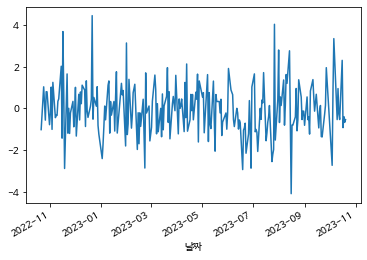

In [50]:
df['등락률'].plot()

<AxesSubplot:ylabel='Frequency'>

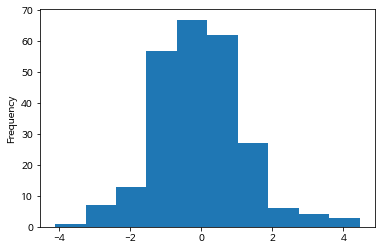

In [51]:
df['등락률'].plot(kind='hist')

확인이 필요한 또 하나의 값이 **왜도, 첨도**입니다.
- 왜도와 첨도를 확인하는 이유는, 모델에 데이터를 넣을 때 데이터의 분포에 따라 적당히 변환해 주어야 성능이 잘 나오기 때문임.

In [52]:
df['등락률'].skew() #왜도 확인:약간 오른쪽으로 치우친 데이터임을 알 수 있다

0.32956181647954846

In [54]:
df['등락률'].kurt() #첨도 확인: 정규분포보다 뾰족한 형태임 (3을 뺀 값을 기준으로 하는 듯)

1.1430383372762116